# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
# import libraries here
import pandas as pd

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`

In [20]:
# your answer here
employee = pd.read_csv('Employee.csv')
employee.head(10)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean salary by department. 
##### Tip : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [3]:
# your answer 

employee.groupby('Department').agg({'Salary':'mean'})


,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [4]:
# your answer 

employee.pivot_table(index='Department',aggfunc='mean',values='Salary')

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title

In [5]:
# your answer here
employee.pivot_table(index='Department',aggfunc='mean',values='Salary',columns='Title',fill_value=0)

Title,VP,analyst,associate
Department,,,
HR,70,32.5,0
IT,70,32.5,60
Sales,0,0.0,55


#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [11]:
# your answer 

employee.pivot_table(index='Title', columns='Years',values='Salary',aggfunc='mean',fill_value=0)


Years,1,2,3,4,7,8
Title,,,,,,
VP,0,0,0,0,0,70
analyst,35,30,0,35,0,0
associate,0,55,55,0,60,0


#### We want to know the information about the mean salary and number of employees in each department and for each job title

In [18]:
# your answer here

employee.groupby(by=['Department','Title']).agg({'Salary':'mean','Name':'count'})\
                                            .rename(columns={'Name':'Num_Employees'})


Salary  Num_Employees
Department Title                           
HR         VP           70.0              1
           analyst      32.5              2
IT         VP           70.0              1
           analyst      32.5              2
           associate    60.0              1
Sales      associate    55.0              2

#### We want to know for each department and for each job title the Salary's median,minimum,maximum and standard deviation. Comment your results

In [22]:
# your answer here

# No puede haber desviación estandar de muestras de un único valor

employee.groupby(by=['Department','Title']).agg({'Salary':['mean','median','max','std']})

Salary                     
                       mean median max       std
Department Title                                
HR         VP          70.0   70.0  70       NaN
           analyst     32.5   32.5  35  3.535534
IT         VP          70.0   70.0  70       NaN
           analyst     32.5   32.5  35  3.535534
           associate   60.0   60.0  60       NaN
Sales      associate   55.0   55.0  55  0.000000

#### Based on your comments, fill the missing values with an appropriate value

In [23]:
# your answer here

employee.groupby(by=['Department','Title']).agg({'Salary':['mean','median','max','std']}).fillna(0)

Salary                     
                       mean median max       std
Department Title                                
HR         VP          70.0   70.0  70  0.000000
           analyst     32.5   32.5  35  3.535534
IT         VP          70.0   70.0  70  0.000000
           analyst     32.5   32.5  35  3.535534
           associate   60.0   60.0  60  0.000000
Sales      associate   55.0   55.0  55  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [25]:
# your answer here

employee.groupby(['Department','Title']).agg({'Name':'count','Salary':'sum'})\
                                        .rename(columns={'Name':'N_emp'})

N_emp  Salary
Department Title                   
HR         VP             1      70
           analyst        2      65
IT         VP             1      70
           analyst        2      65
           associate      1      60
Sales      associate      2     110

#### For each Department and Title, we want to know the the total years of work experience and the mean salary

In [27]:
# your answer here

employee.groupby(['Department','Title']).agg({'Years':'count','Salary':'mean'})\
                                        .rename(columns={'Years':'Years_sum','Salary':'Salary_mean'})

Years_sum  Salary_mean
Department Title                            
HR         VP                 1         70.0
           analyst            2         32.5
IT         VP                 1         70.0
           analyst            2         32.5
           associate          1         60.0
Sales      associate          2         55.0

#### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table

#### * Hint: Write a custom function*

In [54]:
# your answer here
def salary_wo_max(df):
    max_dep = df.groupby('Department').agg({'Salary':'max'})
    lst_temp = []
    for dep in df.Department.unique():
        dict_temp = dict()
        dict_temp['Department'] = dep
        dict_temp['Salary_mean_womax'] = df[(df.Department==dep) & \
                                            (df.Salary<max_dep.loc[dep][0])]\
                                            .Salary.mean()
        lst_temp.append(dict_temp)
    return pd.DataFrame(lst_temp).fillna(0)

In [55]:
# your answer here
salary_wo_max(employee)

,Department,Salary_mean_womax
0,IT,41.666667
1,HR,32.500000
2,Sales,0.000000


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`

In [62]:
# your answer here
fitbit = pd.read_csv('Fitbit.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


#### Explore you dataset in terms of data types and descriptive statistics
#### *Hint: Use Pandas functions from previous lectures*

In [61]:
# your answer here
fitbit.describe().T

,count,mean,std,min,25%,50%,75%,max
Calorie burned,367.0,2741.501362,916.307036,179.000,2698.000,2974.00,3233.00,4351.00
Steps,367.0,10121.588556,5594.836225,0.000,6730.500,10413.00,13916.50,26444.00
Distance,367.0,8.549128,3.409881,0.000,6.155,8.29,10.56,20.45
Floors,367.0,11.724796,10.337370,0.000,5.000,11.00,16.00,101.00
Minutes Sedentary,367.0,563.934482,294.793145,1.002,520.000,663.00,756.50,998.00
Minutes Lightly Active,367.0,236.405995,86.531376,0.000,179.000,226.00,290.00,472.00
Minutes Fairly Active,367.0,26.163488,20.319456,0.000,8.000,24.00,41.50,101.00
Minutes Very Active,367.0,35.722071,31.006682,0.000,10.500,29.00,54.00,153.00
Activity Calories,367.0,2044.147139,2041.267168,0.000,1218.500,1553.00,1927.50,9830.00
MinutesOfSleep,367.0,290.479564,154.752328,0.000,224.000,337.00,400.50,553.00


In [60]:
# your answer here
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    367 non-null    object 
 1   Calorie burned          367 non-null    int64  
 2   Steps                   367 non-null    int64  
 3   Distance                367 non-null    float64
 4   Floors                  367 non-null    int64  
 5   Minutes Sedentary       367 non-null    float64
 6   Minutes Lightly Active  367 non-null    int64  
 7   Minutes Fairly Active   367 non-null    int64  
 8   Minutes Very Active     367 non-null    int64  
 9   Activity Calories       367 non-null    int64  
 10  MinutesOfSleep          367 non-null    int64  
 11  MinutesOfBeingAwake     367 non-null    int64  
 12  NumberOfAwakings        367 non-null    int64  
 13  LengthOfRestInMinutes   367 non-null    int64  
dtypes: float64(2), int64(11), object(1)
memory

#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [64]:
# your answer here
fitbit[['Minutes Very Active','Steps']].corr()

,Minutes Very Active,Steps
Minutes Very Active,1.000000,0.571452
Steps,0.571452,1.000000


#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

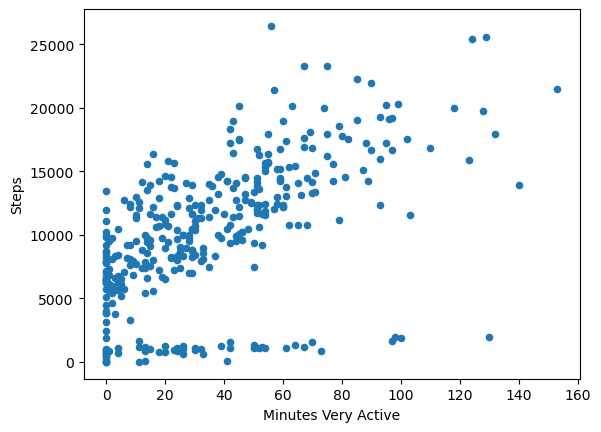

In [69]:
# your answer here
fitbit.plot.scatter(x='Minutes Very Active',y='Steps');

#### What can you say about Minute Very Active and Steps? Write a comment below

In [70]:
# your comment here

# La correlación no es cercana a 1 porque tenemos bastantes outliers:
# 1 - Tenemos muchos datos de pasos con 0 minutos activos. Esto es debido a que es ejercicio relajado tipo paseo que no es catalogado como "very active" por la aplicación
# 2 - Luego hay muchos datos que tienen pocos pasos a pesar de tener muchos minutos activos. Esto puede ser debido a ejercicios estáticos tipo pesas 
#     que no requieren de mucho movimiento

# Quitando estos datos vemos una relación prácticamente líneal

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [71]:
# your answer here

fitbit[['Minutes Sedentary','Steps']].corr()

,Minutes Sedentary,Steps
Minutes Sedentary,1.000000,0.076906
Steps,0.076906,1.000000


#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

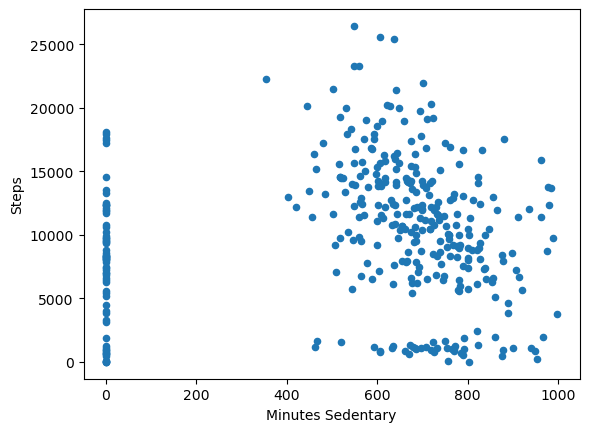

In [75]:
# your answer here
fitbit.plot.scatter(x='Minutes Sedentary',y='Steps');

In [77]:
# Your comment here

# No se ve una relación entre estas dos variables a pesar de lo que se puede intuir

# La columna de cero tiene sentido para valores altos, pero que no haya datos entre 0 y 400 nos hace pensar que pueden ser errores de registro 
# (que se hayan guardado solo los pasos pero no el registro de minutos en sedentario)

# De la misma manera la nube de puntos para pasos bajos pueden ser registros de momentos en que el usuario se ha quitado la pulsera, pero esta
# sigue recogiendo datos

# Quitando estos dos grupos de outliers podemos intuir una relación lineal e inversamente proporcional de estas dos variables

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [79]:
# your answer here

fitbit[['MinutesOfSleep','Steps']].corr()

,MinutesOfSleep,Steps
MinutesOfSleep,1.000000,0.130986
Steps,0.130986,1.000000


#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

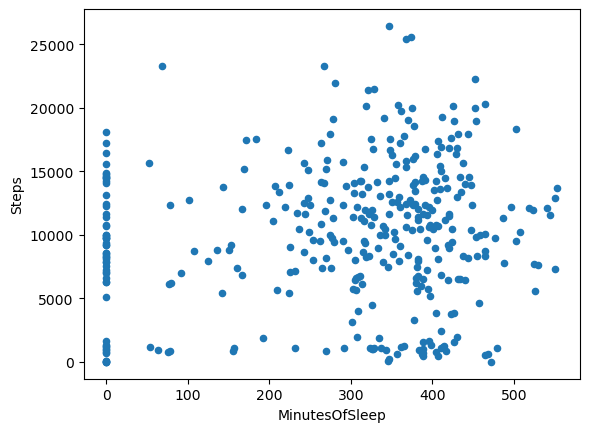

In [80]:
# your answer here
fitbit.plot.scatter(x='MinutesOfSleep',y='Steps');

# Es lógico que estas variables no estén relacionadas, el descanso no está relacionado con la actividad que se haga luego

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [89]:
# your answer here
fit_corr = fitbit[['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']].corr()
fit_corr

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [94]:
# your answer here

fit_corr.loc['Steps'].sort_values(ascending=False)[1:]

Minutes Very Active    0.571452
Floors                 0.306511
Calorie burned         0.255305
MinutesOfSleep         0.130986
Minutes Sedentary      0.076906
Name: Steps, dtype: float64

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`

In [96]:
# your answer here
time_grades = pd.read_csv('Time_Grades.csv')
time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the time_grades dataset.

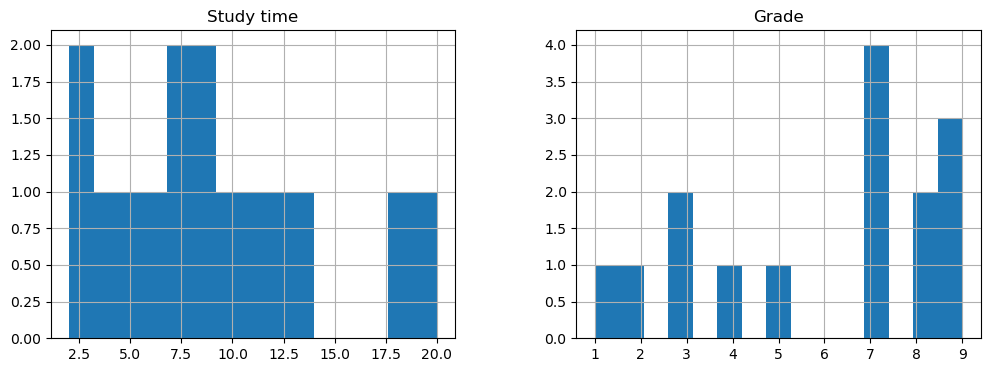

In [99]:
# your answer here
time_grades.hist(figsize=(12,4),bins=15);

#### Is there a correaltion between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [103]:
# your answer
time_grades.iloc[:,1:].corr()

,Study time,Grade
Study time,1.000000,0.798046
Grade,0.798046,1.000000


In [105]:
## your answer
time_grades.iloc[:,1:].corr(method='spearman')

# Podemos ver una alta correlación entre estas dos variables. Algo lóogico a mayor curso más horas de 
# estudio

,Study time,Grade
Study time,1.000000,0.819659
Grade,0.819659,1.000000


#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

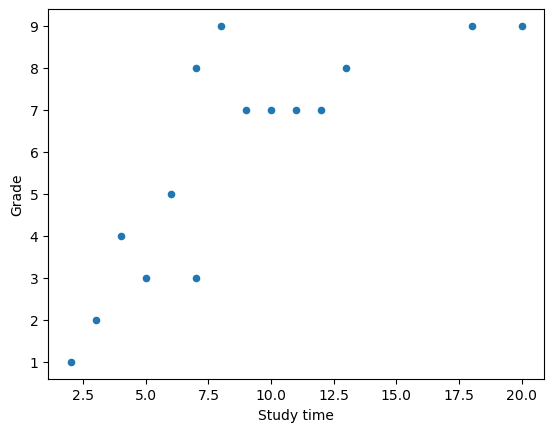

In [106]:
# your answer here

time_grades.plot.scatter(x='Study time',y='Grade');

In [ ]:
#your comment here

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [107]:
#your comment here

# Pearson: busca que los puntos se ajusten a una recta

# Spearman: busca que la relación entre las variables se creciente o decreciente